# 1. 서울시 구별 CCTV 현황 분석

* http://opengov.seoul.go.kr
* http://stat.seoul.go.kr

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font', family = font_name)

# 마이너스(-) 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

## 1) 데이터 수집

In [2]:
# CCTV 자료 불러오기

cctv_seoul = pd.read_csv('data/seoul/cctv.csv')
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [3]:
# 인구수 자료 불러오기

pop_seoul = pd.read_excel('data/seoul/Report.xls', usecols = 'B, D, G, J, N',
                         header = 2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## 2) 전처리

In [4]:
# 컬럼명 변경
## cctv 자료에서 기관명이라는 컬럼명을 '구별'로 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
cctv_seoul.head()

## 인구 자료 컬럼명 변경
pop_seoul.rename(columns={pop_seoul.columns[0]: '구별',
                          pop_seoul.columns[1]: '인구수',
                          pop_seoul.columns[2]: '한국인',
                          pop_seoul.columns[3]: '외국인',
                          pop_seoul.columns[4]: '고령자'}, inplace=True)
pop_seoul.head()

cctv_seoul.columns

Index(['구별', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

## 3) 탐색적 데이터 분석

In [5]:
# 어느 구가 가장 cctv가 많이 설치되어있는가? (가장 적게 설치된 곳은 어디인가?)
## cctv 데이터에서 소계를 기준으로 정렬

print(cctv_seoul.sort_values(by = '소계', ascending = False).head())

print('-'*80)

print(cctv_seoul.sort_values(by = '소계').head())

     구별    소계  2013년도 이전  2014년  2015년  2016년
0   강남구  3238       1292    430    584    932
18  양천구  2482       1843    142     30    467
14  서초구  2297       1406    157    336    398
4   관악구  2109        846    260    390    613
21  은평구  2108       1138    224    278    468
--------------------------------------------------------------------------------
     구별   소계  2013년도 이전  2014년  2015년  2016년
9   도봉구  825        238    159     42    386
2   강북구  831        369    120    138    204
5   광진구  878        573     78     53    174
3   강서구  911        388    258    184     81
24  중랑구  916        509    121    177    109


In [6]:
# cctv 설치 증가율을 알아보자
## cctv 설치 연도별 증가율을 구해서 '최근 증가율' 컬럼 새로 추가
## ((2014+2015+2016)/2013년도 이전) *100

cctv_seoul['최근증가율'] = ((cctv_seoul['2014년']+cctv_seoul['2015년']+cctv_seoul['2016년'])/cctv_seoul['2013년도 이전'])*100

cctv_seoul.sort_values(by = '최근증가율', ascending = False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [7]:
# 인구수 데이터 분석
## 필요없는 행 삭제 : del, drop
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [8]:
## 구별 데이터의 중복이나 결측치 등을 확인
pop_seoul['구별'].unique()
pop_seoul[pop_seoul['구별'].isnull()]

## 확인한 결측치 삭제
pop_seoul.drop([26], inplace = True)

In [9]:
# 어느 구가 인구 수가 가장 많은가?
print(pop_seoul.sort_values(by = '인구수', ascending = False).head())

     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807


In [10]:
# 외국인비율, 고령자비율 컬럼을 추가해서 순위 확인
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
print(pop_seoul.sort_values(by = '외국인비율', ascending = False).head())
print('-'*80)

pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
print(pop_seoul.sort_values(by = '고령자비율', ascending = False).head())

      구별     인구수     한국인    외국인    고령자     외국인비율
19  영등포구  403988  369128  34860  54704  8.628969
18   금천구  253344  234238  19106  34640  7.541525
17   구로구  440396  408369  32027  59838  7.272319
2     중구  135139  126082   9057  21655  6.701988
3    용산구  245411  229909  15502  37238  6.316750
--------------------------------------------------------------------------------
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15.735231
6   동대문구  364962  349308  15654  56284  4.289214  15.421880


In [11]:
# cctv 데이터와 인구대비 데이터를 합치고 분석하기

data_result = pd.merge(cctv_seoul, pop_seoul, on = '구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [12]:
# 필요없는 컬럼 제거 : 2013년도 이전, 2014~2016년도

del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [13]:
# 구별 컬럼을 인덱스로 설정
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976


In [14]:
# cctv 갯수(소계)와 인구 데이터 중 어느 변수와 관계가 있는지 확인
## 상관계수 : -1 ~ 1
## 0.3 이하 : 약한 상관관계
## 0.7 이하 : 뚜렷한 상관관계

np.corrcoef(data_result['고령자비율'],data_result['소계'])
np.corrcoef(data_result['외국인비율'],data_result['소계'])
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

In [15]:
print(data_result.sort_values(by = '소계', ascending = False).head())
print('-'*80)

print(data_result.sort_values(by = '인구수', ascending = False).head())
print('-'*80)

print(data_result.sort_values(by = '인구수').head())

       소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율
구별                                                                      
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544
양천구  2482   34.671731  473087  469221   3866  56070  0.817186  11.851943
서초구  2297   63.371266  445164  440954   4210  54055  0.945719  12.142716
관악구  2109  149.290780  522292  504445  17847  70807  3.417054  13.556976
은평구  2108   85.237258  490253  485902   4351  75535  0.887501  15.407351
--------------------------------------------------------------------------------
       소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율
구별                                                                      
송파구  1081  104.347826  671994  665282   6712  77978  0.998818  11.603973
강서구   911  134.793814  608361  601696   6665  77381  1.095567  12.719586
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544
노원구  1566  188.929889  555803  551902   390

In [17]:
# 'cctv비율' 컬럼 추가 : 소계 / 인구수 * 100

data_result['cctv비율'] = data_result['소계'] / data_result['인구수'] *100

print(data_result.sort_values(by = 'cctv비율', ascending = False).head())

       소계       최근증가율     인구수     한국인    외국인    고령자     외국인비율      고령자비율  \
구별                                                                         
종로구  1619  248.922414  164348  154549   9799  26429  5.962348  16.081121   
용산구  2096   53.216374  245411  229909  15502  37238  6.316750  15.173729   
중구   1023  147.699758  135139  126082   9057  21655  6.701988  16.024242   
강남구  3238  150.619195  557865  552976   4889  65859  0.876377  11.805544   
금천구  1348  100.000000  253344  234238  19106  34640  7.541525  13.673109   

       cctv비율  
구별             
종로구  0.985105  
용산구  0.854077  
중구   0.756998  
강남구  0.580427  
금천구  0.532083  


## 4) 시각화

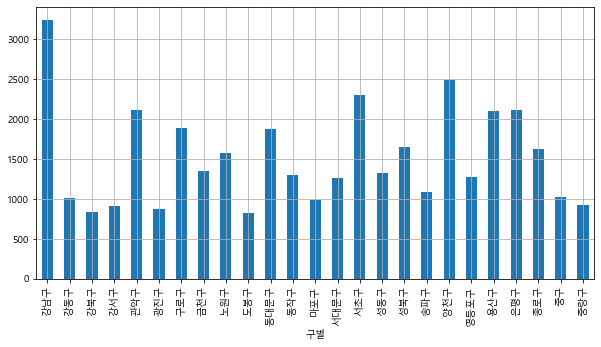

In [18]:
# cctv가 많이 설치된 구별로 그래프 그리기

data_result['소계'].plot(kind = 'bar')
data_result['소계'].plot.bar()
data_result['소계'].plot(kind = 'bar', figsize = (10, 5), grid = True)

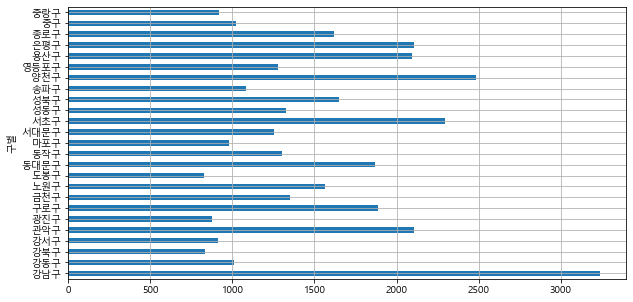

In [19]:
data_result['소계'].plot(kind='barh', figsize=(10, 5), grid=True)

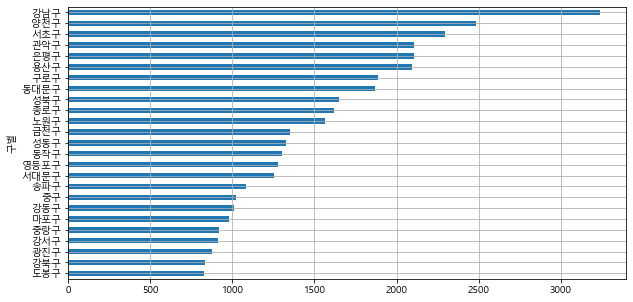

In [20]:
data_result['소계'].sort_values().plot(kind='barh', figsize=(10, 5), grid=True)

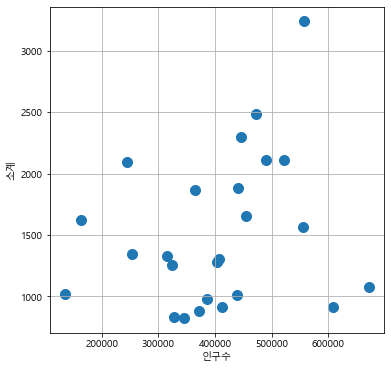

In [24]:
# cctv 설치 대수와 인구수의 관계를 그래프로 확인

plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 100)
plt.xlabel('인구수')
plt.ylabel('소계')
plt.grid()

In [26]:
# poly1d() : 방정식 생성

print(np.poly1d([1, 2]))   # 1차 방정식 생성
print(np.poly1d([1, 2, 3]))  # 2차 방정식 생성

 
1 x + 2
   2
1 x + 2 x + 3


In [28]:
# 회귀선 작성 : polyfit()

fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
print(fp1)    # 기울기, 절편 출력

f1 = np.poly1d(fp1)
print(f1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


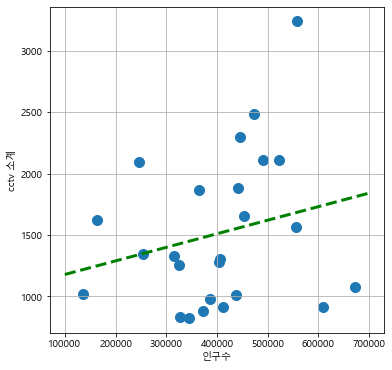

In [30]:
fx = np.linspace(100000, 700000, 100)    # x좌표 범위 지정

plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 100)
#plt.plot(data_result['인구수'], f1(data_result['인구수']), lw = 3,
#        color = 'g', ls = 'dashed')
plt.plot(fx, f1(fx), lw = 3, color = 'g', ls = 'dashed')
plt.xlabel('인구수')
plt.ylabel('cctv 소계')
plt.grid()

In [31]:
# 각 데이터의 오차를 구해서 '오차' 컬럼 추가

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
강동구,1010,166.490765,438225,434027,4198,56983,0.957955,13.003138,0.230475,542.582309
강북구,831,125.203252,327511,323862,3649,57002,1.114161,17.404606,0.253732,599.318223
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
관악구,2109,149.290780,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517


In [40]:
df_sort = data_result.sort_values(by = '오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,3238,150.619195,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,34.671731,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,134.793814,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,53.216374,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,63.371266,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790


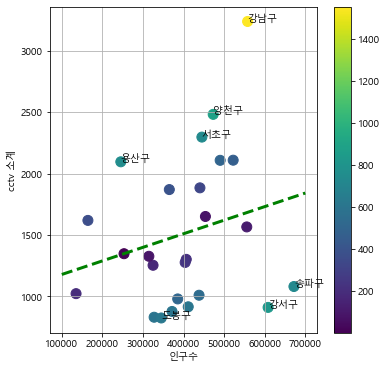

In [47]:
plt.figure(figsize = (6, 6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 100,
           c = data_result['오차'])
plt.plot(fx, f1(fx), lw = 3, color = 'g', ls = 'dashed')
plt.xlabel('인구수')
plt.ylabel('cctv 소계')
plt.grid()
plt.colorbar()


for i in range(7) :
    plt.text(df_sort['인구수'][i], df_sort['소계'][i], df_sort.index[i],
            fontsize = 10)

In [48]:
# 최종 결과물을 파일로 저장

df_sort.to_csv('data/seoul/cctv_result_utf.csv', encoding = 'utf-8')
df_sort.to_csv('data/seoul/cctv_result_euc.csv', encoding = 'euc-kr')